In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import src.utils.metrics as metrics
import config
metrics.analyze_scoreboard(config.TRIALS_HISTORY_PATH, config.ATTACKS_ALLOWED)


Maximum score achieved in 5: 92
Data of moves_df at the index of maximum score in the last column:
Move_1    11 <-> 7
Move_2    9 <-> 12
Move_3     7 <-> 3
Move_4     4 <-> 1
Move_5     7 <-> 6
Name: 9, dtype: object


In [2]:
moves_df, scores_df = metrics.get_scoreboard(config.TRIALS_HISTORY_PATH, config.ATTACKS_ALLOWED)

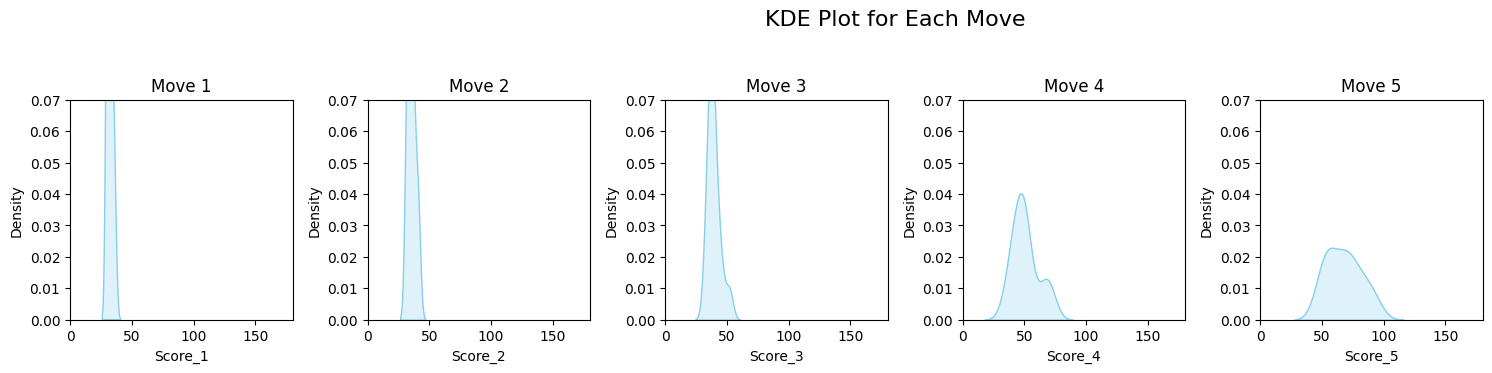

In [3]:
# Create a DataFrame where each column is a move
df = pd.DataFrame(scores_df).T  # Transpose so each row = move

# Plotting
fig, axes = plt.subplots(3, 6, figsize=(18, 9))
axes = axes.flatten()

for i in range(df.shape[0]):
    sns.kdeplot(df.iloc[i].dropna(), ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f"Move {i+1}")
    axes[i].set_xlim(0, 180)
    axes[i].set_ylim(0, 0.07)

# Remove extra subplots
for j in range(df.shape[0], len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("KDE Plot for Each Move", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

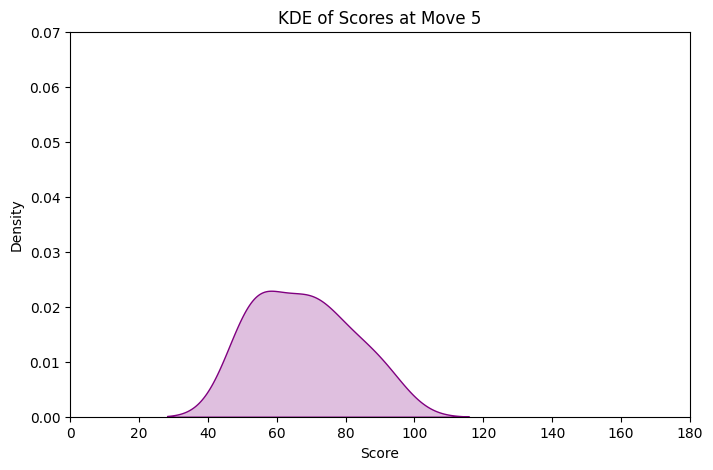

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
data = scores_df.T

def update(move_index):
    ax.clear()
    move_scores = data.iloc[move_index].dropna()
    sns.kdeplot(move_scores, fill=True, color='purple', ax=ax)
    ax.set_xlim(0, 180)
    ax.set_ylim(0, 0.07)
    ax.set_title(f"KDE of Scores at Move {move_index + 1}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")

# Create animation
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=len(data), interval=800, repeat=True)

# To save the animation as a .gif or .mp4:
ani.save('score_distribution.gif', writer='pillow')
# ani.save('score_distribution.mp4', writer='ffmpeg')

plt.show()